**STEP 1**: The installation, importation and upgrade of the needed libraries. This is important as there would be no code without these.

In [9]:
!pip install yfinance pandas numpy matplotlib

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**STEP 2**: The creation of an interface that allows for the input of the ticker symbol of the equity, start date of data collection and end date of data collection. The interface should address the ease of changeability

In [10]:
ticker = "MSFT"
start_date = "2020-01-01"
end_date = "2024-11-22"

data = yf.download(ticker, start_date, end_date)
print(data)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           MSFT        MSFT        MSFT        MSFT   
Date                                                                        
2020-01-02 00:00:00+00:00  153.630661  160.619995  160.729996  158.330002   
2020-01-03 00:00:00+00:00  151.717697  158.619995  159.949997  158.059998   
2020-01-06 00:00:00+00:00  152.109894  159.029999  159.100006  156.509995   
2020-01-07 00:00:00+00:00  150.722992  157.580002  159.669998  157.320007   
2020-01-08 00:00:00+00:00  153.123779  160.089996  160.800003  157.949997   
...                               ...         ...         ...         ...   
2024-11-15 00:00:00+00:00  414.170990  415.000000  422.799988  413.640015   
2024-11-18 00:00:00+00:00  414.929474  415.760010  418.399994  412.100006   
2024-11-19 00:00:00+00:00  416.955414  417.790009  417.940002  411.549988   
2024-11-20 00:00:00+00:00  414.659973  415.489990  417.290009  410.579987   

**STEP 3**: Dropping of the columns that are not needed for this project. The needed columns for this project are DATE and CLOSE

In [11]:
data = data.drop(columns=['Close', 'Open', 'Volume', 'Low', 'High'])
print(data)

Price                       Adj Close
Ticker                           MSFT
Date                                 
2020-01-02 00:00:00+00:00  153.630661
2020-01-03 00:00:00+00:00  151.717697
2020-01-06 00:00:00+00:00  152.109894
2020-01-07 00:00:00+00:00  150.722992
2020-01-08 00:00:00+00:00  153.123779
...                               ...
2024-11-15 00:00:00+00:00  414.170990
2024-11-18 00:00:00+00:00  414.929474
2024-11-19 00:00:00+00:00  416.955414
2024-11-20 00:00:00+00:00  414.659973
2024-11-21 00:00:00+00:00  412.869995

[1232 rows x 1 columns]


**STEP 4**: Conversion of the collected data into a dataframe. There are several reasons for this step. One being its importance in data preprocessing. Another being its importance in handling diverse data (float, integer, strings etc). It is a flexibe structure for this purpose. Also, it is also needed in handling missing data.

In [12]:
df = pd.DataFrame(data)
print(df)

Price                       Adj Close
Ticker                           MSFT
Date                                 
2020-01-02 00:00:00+00:00  153.630661
2020-01-03 00:00:00+00:00  151.717697
2020-01-06 00:00:00+00:00  152.109894
2020-01-07 00:00:00+00:00  150.722992
2020-01-08 00:00:00+00:00  153.123779
...                               ...
2024-11-15 00:00:00+00:00  414.170990
2024-11-18 00:00:00+00:00  414.929474
2024-11-19 00:00:00+00:00  416.955414
2024-11-20 00:00:00+00:00  414.659973
2024-11-21 00:00:00+00:00  412.869995

[1232 rows x 1 columns]


**STEP 5**: Firstly, the daily adjusted close percentage change is calculated and the standard deviation is derived to determine the daily volatility. Then the daily volatility is multiplied by the square root of the trading days.

In [15]:
df['Daily Returns'] = df['Adj Close'].pct_change()

daily_volatility = df['Daily Returns'].std()

annualized_volatility = daily_volatility * np.sqrt(252)

print(f"Stock Ticker: {ticker}")
print(f"Period: {start_date} to {end_date}")
print(f"Daily Volatility: {daily_volatility:.5f}")
print(f"Annualized Volatility: {annualized_volatility:.5f}")

Stock Ticker: MSFT
Period: 2020-01-01 to 2024-11-22
Daily Volatility: 0.01933
Annualized Volatility: 0.30690


**STEP 6**: Plotting the daily returns chart

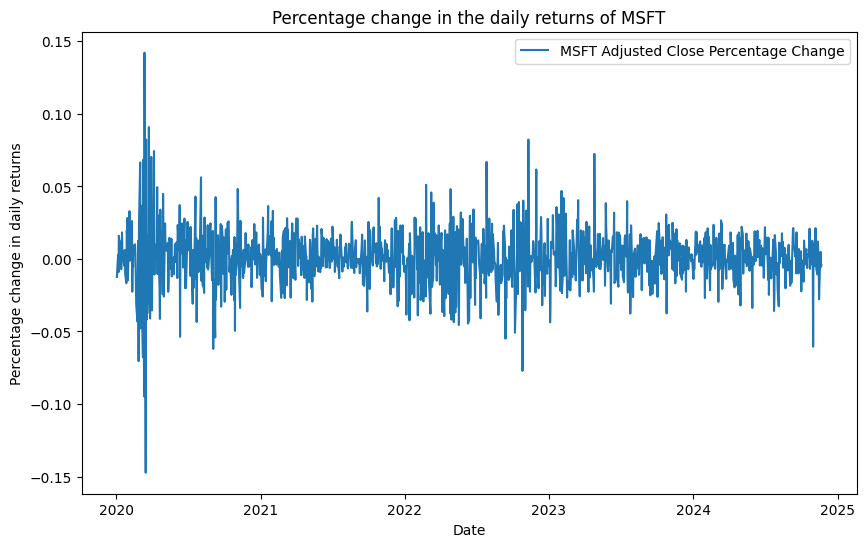

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df['Daily Returns'], label=f"{ticker} Adjusted Close Percentage Change")
plt.title(f"Percentage change in the daily returns of {ticker}")
plt.xlabel("Date")
plt.ylabel("Percentage change in daily returns")
plt.legend()
plt.show()